<a href="https://colab.research.google.com/github/auebgeorge/24032024ipynb/blob/main/quadrativ_effect_on_1mio_rows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
pip install ppscore

pip install ppscore


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import ppscore as pps

pip install ppscore


In [23]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

In [24]:
df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]

<Axes: xlabel='x', ylabel='y'>

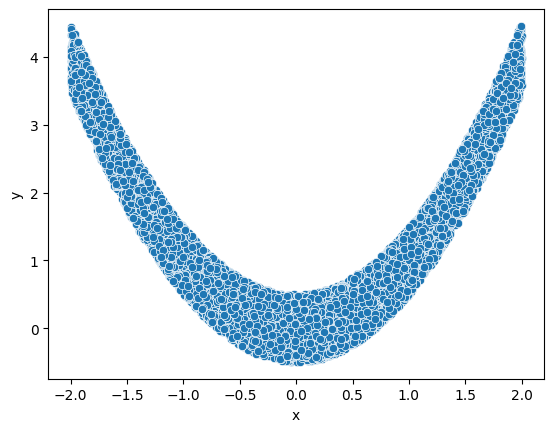

In [25]:
sns.scatterplot(x="x", y="y", data=df.sample(10_000))

In [26]:
matrix = pps.matrix(df)

In [27]:
matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.248467,0.338205,DecisionTreeRegressor()
2,x,y,0.669986,regression,True,mean absolute error,1.024965,0.338253,DecisionTreeRegressor()
3,error,x,0.000000,regression,True,mean absolute error,1.009096,1.318547,DecisionTreeRegressor()
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.024965,1.354807,DecisionTreeRegressor()
6,y,x,0.000000,regression,True,mean absolute error,1.009096,1.087681,DecisionTreeRegressor()
7,y,error,0.000000,regression,True,mean absolute error,0.248467,0.280362,DecisionTreeRegressor()
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


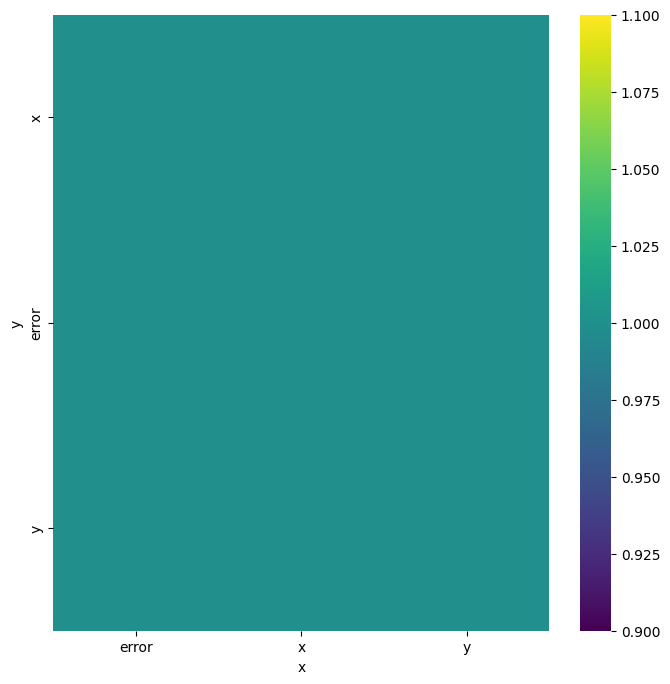

In [28]:
# @title x vs y

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['y'].value_counts()
    for x_label, grp in matrix.groupby('x')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('x')
_ = plt.ylabel('y')

<Axes: title={'center': 'PPS matrix'}, xlabel='feature', ylabel='target'>

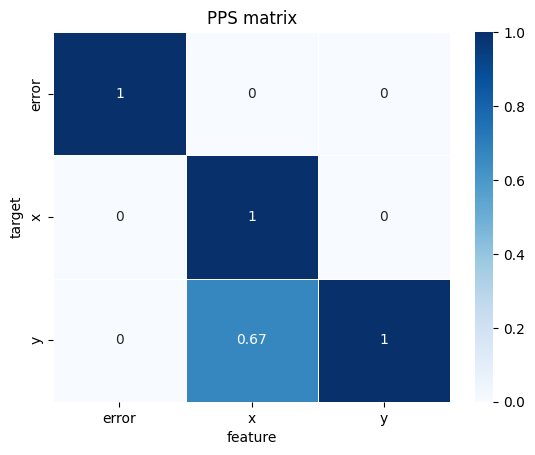

In [29]:
heatmap(matrix)

In [19]:
pps.score(df, "x", "y")

{'x': 'x',
 'y': 'y',
 'ppscore': 0.673421275513379,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.0308246868739888,
 'model_score': 0.3366454114086277,
 'model': DecisionTreeRegressor()}